In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(470, 840, 3)


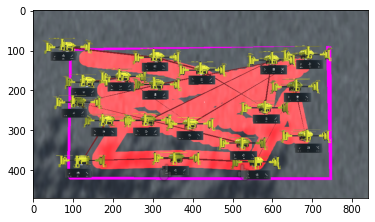

In [3]:
img = cv2.imread("1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#plt.xticks([]), plt.yticks([])
print(img.shape)
plt.imshow(img)

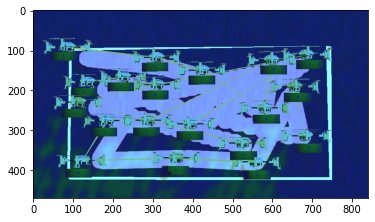

In [4]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

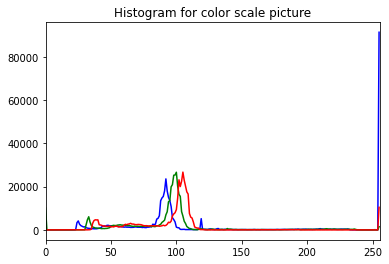

In [5]:
color = ('b','g','r') 
for channel,col in enumerate(color): 
    histr = cv2.calcHist([img],[channel],None,[256],[0,256]) 
    plt.plot(histr,color = col) 
    plt.xlim([0,256]) 
plt.title('Histogram for color scale picture') 
plt.show() 

k = cv2.waitKey(0) & 0xFF 
#while True: 
     
#    if k == 27: break    # ESC key to exit 
cv2.destroyAllWindows() 

In [6]:
def get_RGBColorCode(img, x=0 ,y=0):
    # method 1
    (B, G, R) = cv2.split(img) # 3 channel
    b, g, r  = B[y ,x], G[y ,x], R[y ,x]
    print("RGB = ({}, {}, {})".format(r, g, b))

In [80]:
get_RGBColorCode(img, 400, 250)   # RGB = (255, 0, 255) is pink

RGB = (103, 97, 255)


470
[array([ 90,  90,  90, ..., 424, 424, 424]), array([735, 736, 737, ..., 747, 748, 749])]
edge: [735 736 737 ... 747 748 749]
S:  (90, 86)   End:  (424, 749)
img type:  <class 'numpy.ndarray'>


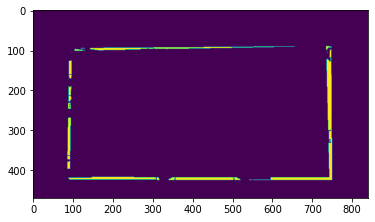

In [76]:
lower_pink = np.array([255, 0, 255])
upper_pink = np.array([255, 0, 255])
mask = cv2.inRange(img, lower_pink, upper_pink) 
plt.imshow(mask)
#print(type(mask))
#print(mask.shape)
Edge = np.nonzero(mask)
print(mask.shape[0])
print(list(Edge))
#col = mask.shape[0] - 1
#row = 
print("edge:", Edge[1])
max(Edge[0])


#Get the Min & Max Position
StartX, StartY = min(Edge[0]), min(Edge[1])
EndX, EndY = max(Edge[0]), max(Edge[1])

#Crop the Original Image
print("S: " , (StartX, StartY) , "  End: ", (EndX, EndY))





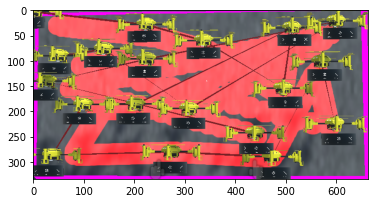

In [64]:
w = EndX - StartX
h = EndY - StartY
crop_img = img[SStartX:StartX+w, StartY:StartY+h]
plt.imshow(crop_img)

In [65]:
#Crop Image Function
def Crop_Image(PATH):
    img = cv2.imread(PATH)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    lower_pink = np.array([255, 0, 255])
    upper_pink = np.array([255, 0, 255])
    mask = cv2.inRange(img, lower_pink, upper_pink) 
    Edge = np.nonzero(mask)

    #Get the Min & Max Position
    StartX, StartY = min(Edge[0]), min(Edge[1])
    EndX, EndY = max(Edge[0]), max(Edge[1])
    
    w = EndX - StartX
    h = EndY - StartY
    crop_img = img[StartX:StartX+w, StartY:StartY+h]
    
    return crop_img

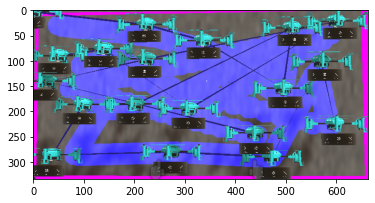

In [135]:
img = Crop_Image("1.png")
bgr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(bgr)

RGB = (78, 255, 255)
0.5193278601168704


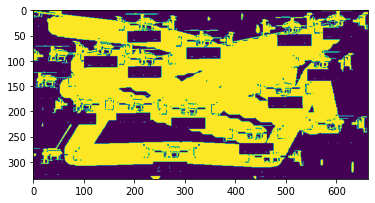

In [166]:
get_RGBColorCode(img, 30, 280)

lower_pink = np.array([100, 5, 5])
upper_pink = np.array([255, 255, 254])
mask = cv2.inRange(img, lower_pink, upper_pink) 
plt.imshow(mask)
R = np.count_nonzero(mask)
#print("Score: ", (np.count_nonzero(mask) / mask.shape[0] * mask.shape[1]))
All = mask.size
print(R/All)

RGB = (56, 51, 46)
0.08571093107901843


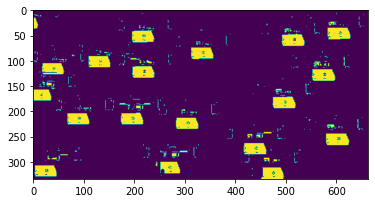

In [174]:
get_RGBColorCode(img, 0, 310)

lower = np.array([0, 0, 0])
upper = np.array([56, 51, 46])
mask = cv2.inRange(img, lower, upper) 
plt.imshow(mask)
R = np.count_nonzero(mask)
#print("Score: ", (np.count_nonzero(mask) / mask.shape[0] * mask.shape[1]))
All = mask.size
print(R/All)

In [206]:

#Input is cv2 image 
def Score(img):
    lower = np.array([100, 5, 5])
    upper = np.array([255, 255, 254])
    mask1 = cv2.inRange(img, lower, upper) 
    #plt.imshow(mask1)
    Red = np.count_nonzero(mask1)
    
    Button_lower = np.array([0, 0, 0])
    Button_upper = np.array([56, 51, 46])
    mask2 = cv2.inRange(img, Button_lower, Button_upper) 
    #plt.imshow(mask2)
    Button = np.count_nonzero(mask2)
    
    print((Red + Button)/All)
    return ((Red + Button)/All) * 100 

In [207]:
Score(Crop_Image("1.png"))

0.6050387911958888


60.50387911958887

In [208]:
Score(Crop_Image("2.png"))

0.2000659314854454


20.006593148544543